In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
# Load obstacle data
data = np.genfromtxt('/home/oscar_palfelt/MSc_thesis/EECS_Degree_Project/motion_planning/data/pathDataDifficultTest', delimiter=',')
numEntries = data.shape[0]

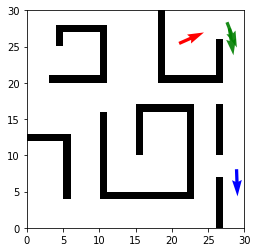

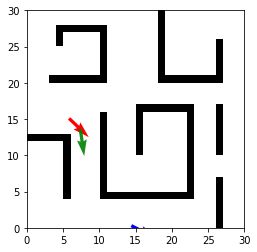

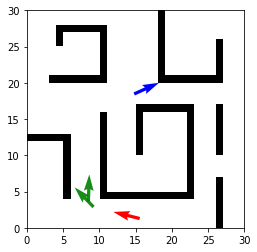

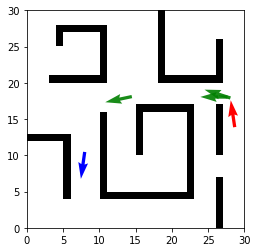

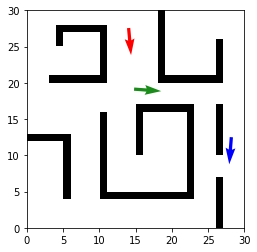

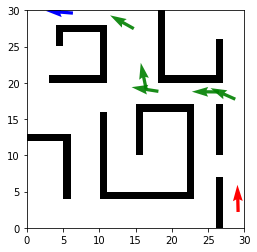

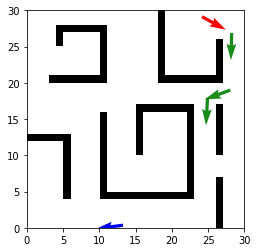

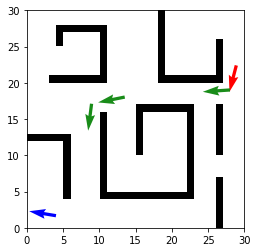

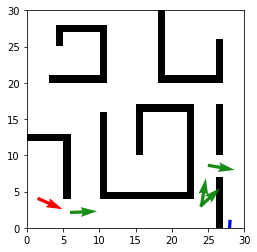

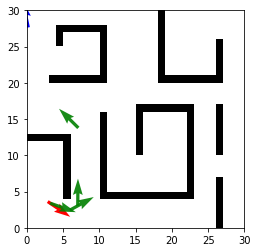

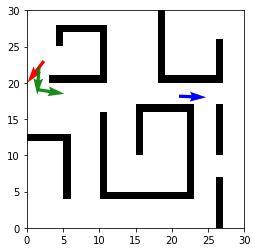

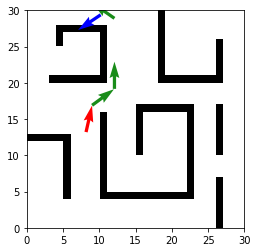

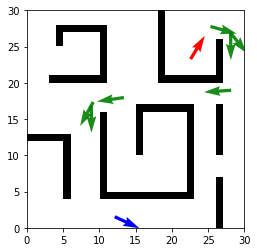

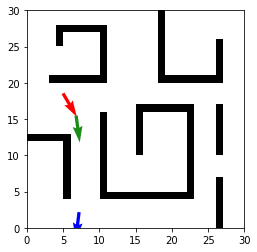

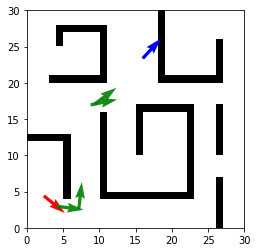

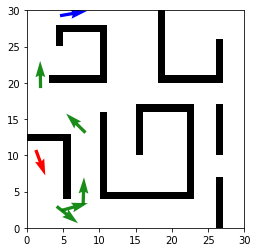

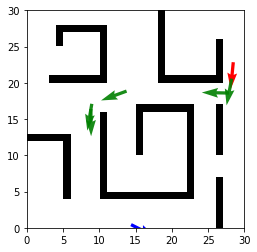

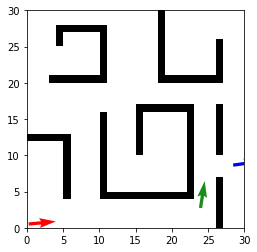

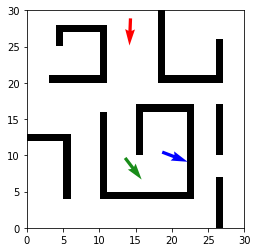

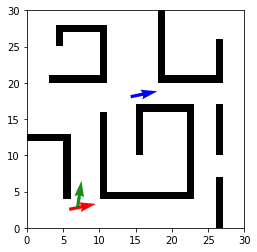

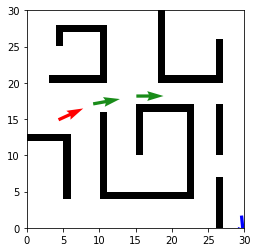

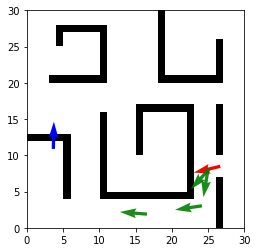

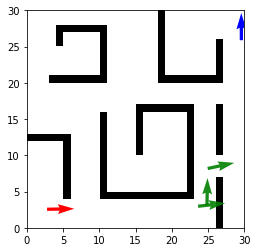

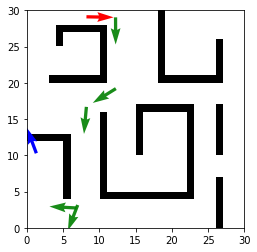

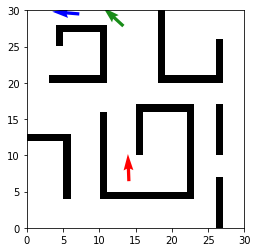

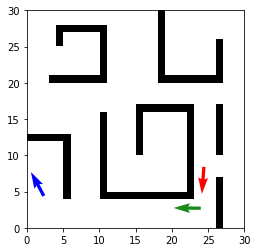

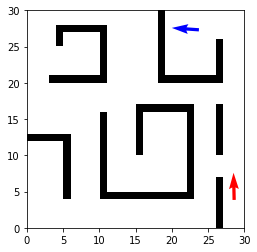

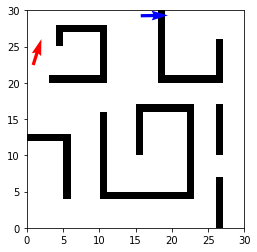

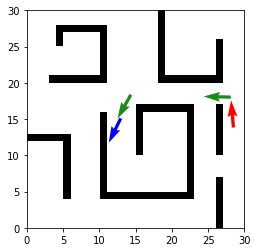

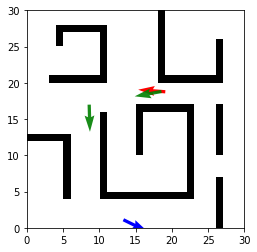

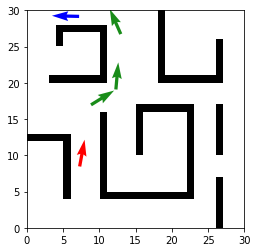

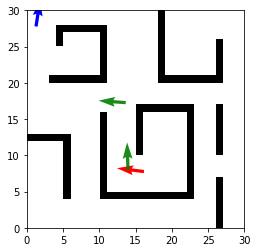

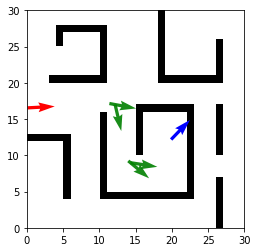

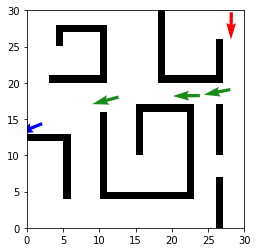

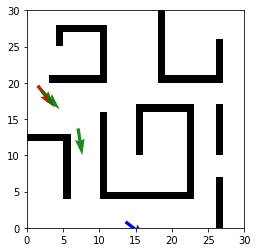

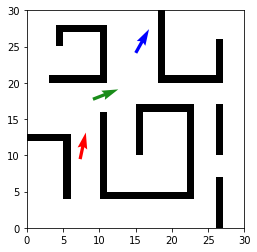

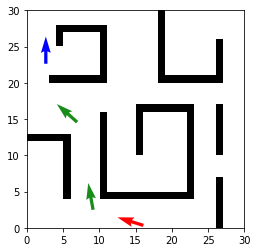

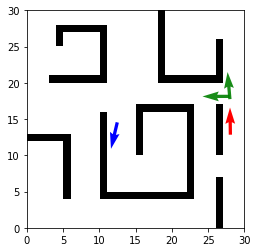

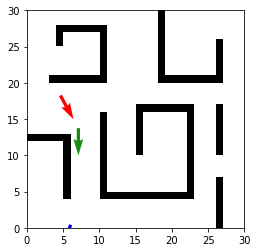

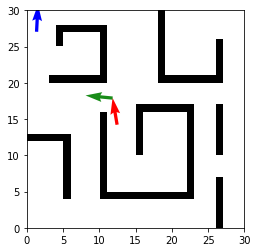

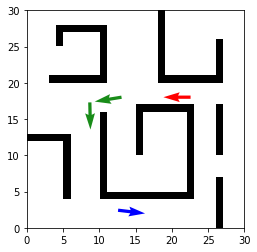

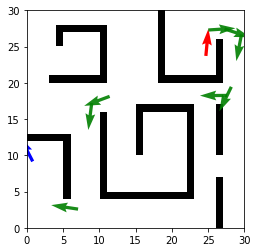

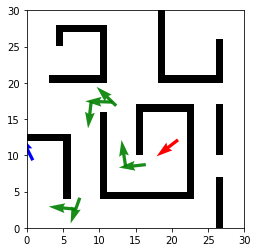

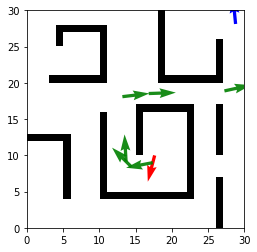

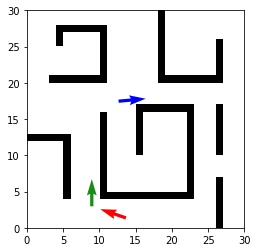

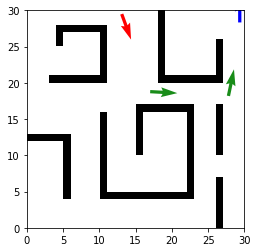

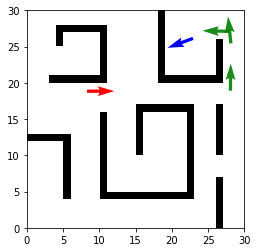

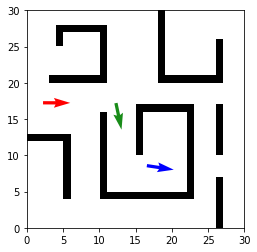

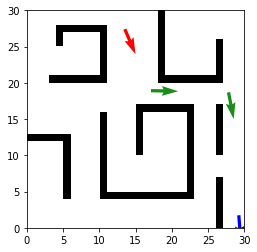

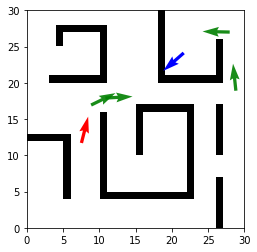

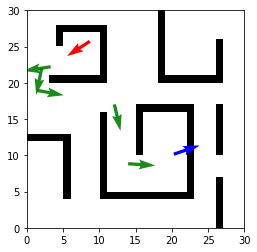

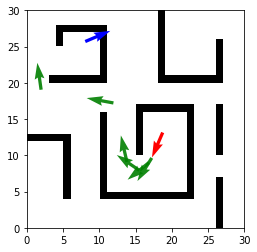

37


In [16]:
# vizualize data samples of 4D pose problem (x,y,xdot,ydot)

mapImg = cv2.imread('/home/oscar_palfelt/MSc_thesis/EECS_Degree_Project/motion_planning/data_generation/map_difficult.png', 0)
occGrid = np.clip(mapImg, 0, 1)
assert occGrid.shape[0] == occGrid.shape[1]
gridSize = occGrid.shape[0]

val = data[0, 4]
npaths = 0
plot = True
prevInd = 0
for i in range(0, 200):

    if not val == data[i, 4]:

        if plot:
            xy = data[prevInd:i-1, 0:2]
            xydot = data[prevInd:i-1, 2:4]
            init = data[prevInd, 4:8]
            goal = data[prevInd, 8:]

            fig, axs = plt.subplots(1)
            axs.quiver(init[0] * gridSize, init[1] * gridSize, init[2], init[3], color="red", scale=8.0, width=0.015)
            axs.quiver(goal[0] * gridSize, goal[1] * gridSize, goal[2], goal[3], color="blue", scale=8.0, width=0.015)
            axs.quiver(xy[:, 0] * gridSize, xy[:, 1] * gridSize, xydot[:, 0], xydot[:, 1], color="green", scale=8.0, width=0.015, alpha=0.9)
            axs.imshow(mapImg, extent=[0, gridSize, 0, gridSize], cmap='gray')
            plt.show()

        if i - prevInd > 2:
            npaths += 1
        val = data[i, 4]
        prevInd = i

print(npaths)